# **ANZ VIRTUAL EXPERIENCE PROGRAM**
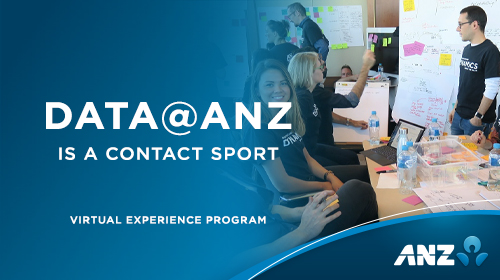

**Background** 

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

# **Task 1:**

Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?

# **Task 2:**

For this task, you’ll likely need to use statistical software such as R, SAS, or Python.

Using the same transaction dataset, identify the annual salary for each customer

Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?






# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
%matplotlib inline
sns.set_style('whitegrid')

# **Read the Data**

In [2]:
transact = pd.read_excel('ANZ synthesised transaction dataset.xlsx',sheet_name='DSynth_Output_100c_3m_v3')

# **Understanding the Data**

In [3]:
transact.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


Check the columns in the dataframe

In [4]:
transact.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

Checking the shape of the dataframe

In [5]:
transact.shape

(12043, 23)

Get the info of the dataframe

In [6]:
transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

Summary statistics of the dataframe

In [7]:
transact.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
card_present_flag,7717.0,0.802644,0.398029,0.00,1.000,1.00,1.000,1.00
merchant_code,883.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
balance,12043.0,14704.195553,31503.722652,0.24,3158.585,6432.01,12465.945,267128.52
age,12043.0,30.582330,10.046343,18.00,22.000,28.00,38.000,78.00
amount,12043.0,187.933588,592.599934,0.10,16.000,29.00,53.655,8835.98


# **Exploratory Data Analysis**

**Confirm the one-to-one link of the account and the customer_id**

In [8]:
transact['account'].nunique(),transact['customer_id'].nunique()

(100, 100)

Each customer_id has a corresponding unique account associated with it.

**Check the number of unique transactions in the dataset**

In [9]:
transact['transaction_id'].nunique()

12043

The number of unique transaction_id(s) is the same length as the dataframe shape. There are no duplicate transactions.

**Change the format of the extraction and date columns to datetime**

In [10]:
transact['extraction'] = pd.to_datetime(transact['extraction'])
transact['date'] = pd.to_datetime(transact['date'])

In [11]:
DateRange = (transact.date.max()-transact.date.min()).days
DateRange

91

The dataset contains records for 91 days, implying that records for one day are missing, i.e, 2018-08-16.

**Derive the weekday and hour of each transaction**

Derive the unique week day, month and hour for each transaction. This gives greater granularity when exploring the data.

In [12]:
transact['weekday'] = transact['extraction'].dt.dayofweek
transact['hour'] = transact['extraction'].dt.hour
transact['month'] = transact['extraction'].apply(lambda time: time.month)
transact['day_name'] = transact['extraction'].dt.day_name()

In [13]:
transact['month'] = transact.month.replace({8:'Aug',9:'Sept',10:'Oct'})

**Split the customer and merchant geo-locations into individual columns for analysis**

In [14]:
transact['merchant_long_lat']

0        153.38 -27.99
1        151.21 -33.87
2        151.21 -33.87
3        153.05 -26.68
4        153.44 -28.06
             ...      
12038    145.23 -37.81
12039    150.88 -33.96
12040    150.92 -33.74
12041    145.09 -37.91
12042    151.19 -33.93
Name: merchant_long_lat, Length: 12043, dtype: object

In [15]:
transact['long_lat'] = transact['merchant_long_lat'].astype(str)
transact[['cust_long','cust_lat']] = transact.long_lat.str.split(' ',expand=True)
transact[['cust_long','cust_lat']] = transact[['cust_long','cust_lat']].astype(float)

In [16]:
transact['merchant_long_lat'] = transact['merchant_long_lat'].astype(str)
transact[['merchant_longitude','merchant_latitude']] = transact.merchant_long_lat.str.split(' ',expand=True)
transact[['merchant_longitude','merchant_latitude']] = transact[['merchant_longitude','merchant_latitude']].astype(float)

In [17]:
transact[['cust_long','cust_lat']].head()

,cust_long,cust_lat
0,153.38,-27.99
1,151.21,-33.87
2,151.21,-33.87
3,153.05,-26.68
4,153.44,-28.06


**Check the range of the customer location and filter out transactions for those who do not reside in Australia**

In [18]:
import requests
url = 'http://www.ga.gov.au/scientific-topics/national-location-information/dimensions/continental-extremities'
html = requests.get(url).content
df_list = pd.read_html(html)
extremeties = df_list[-1]
extremeties

,EXTREMITY,FEATURE,LATITUDE,LONGITUDE
0,North,"Cape York (Cape York Peninsula, Queensland)","10° 41' 21"" S","142° 31' 50"" E"
1,East,"Cape Byron (Byron Bay, New South Wales)","28° 38' 15"" S","153° 38' 14"" E"
2,South (Mainland),"South Point (Wilsons Promontory, Victoria)","39°; 08' 20"" S","146° 22' 26"" E"
3,South,South East Cape (Tasmania),"43° 38' 40"" S","146° 49' 30"" E"
4,West,"Steep Point (Shark Bay, Western Australia)","26° 09' 5"" S","113° 09' 18"" E"


In [19]:
cust_check = transact[(transact['cust_lat']>-44) & (transact['cust_lat']<-10) & (transact['cust_long']>113) & (transact['cust_long']<154)]
cust_check['customer_id'].nunique()

100

**Check the distribution of missing values**

In [20]:
transact.isnull().sum()

status                    0
card_present_flag      4326
bpay_biller_code      11158
account                   0
currency                  0
long_lat                  0
txn_description           0
merchant_id            4326
merchant_code         11160
first_name                0
balance                   0
date                      0
gender                    0
age                       0
merchant_suburb        4326
merchant_state         4326
extraction                0
amount                    0
transaction_id            0
country                   0
customer_id               0
merchant_long_lat         0
movement                  0
weekday                   0
hour                      0
month                     0
day_name                  0
cust_long              4326
cust_lat               4326
merchant_longitude     4326
merchant_latitude      4326
dtype: int64

In [21]:
100*transact.isnull().sum()/transact.shape[0]

status                 0.000000
card_present_flag     35.921282
bpay_biller_code      92.651333
account                0.000000
currency               0.000000
long_lat               0.000000
txn_description        0.000000
merchant_id           35.921282
merchant_code         92.667940
first_name             0.000000
balance                0.000000
date                   0.000000
gender                 0.000000
age                    0.000000
merchant_suburb       35.921282
merchant_state        35.921282
extraction             0.000000
amount                 0.000000
transaction_id         0.000000
country                0.000000
customer_id            0.000000
merchant_long_lat      0.000000
movement               0.000000
weekday                0.000000
hour                   0.000000
month                  0.000000
day_name               0.000000
cust_long             35.921282
cust_lat              35.921282
merchant_longitude    35.921282
merchant_latitude     35.921282
dtype: f

In [22]:
import missingno as msno

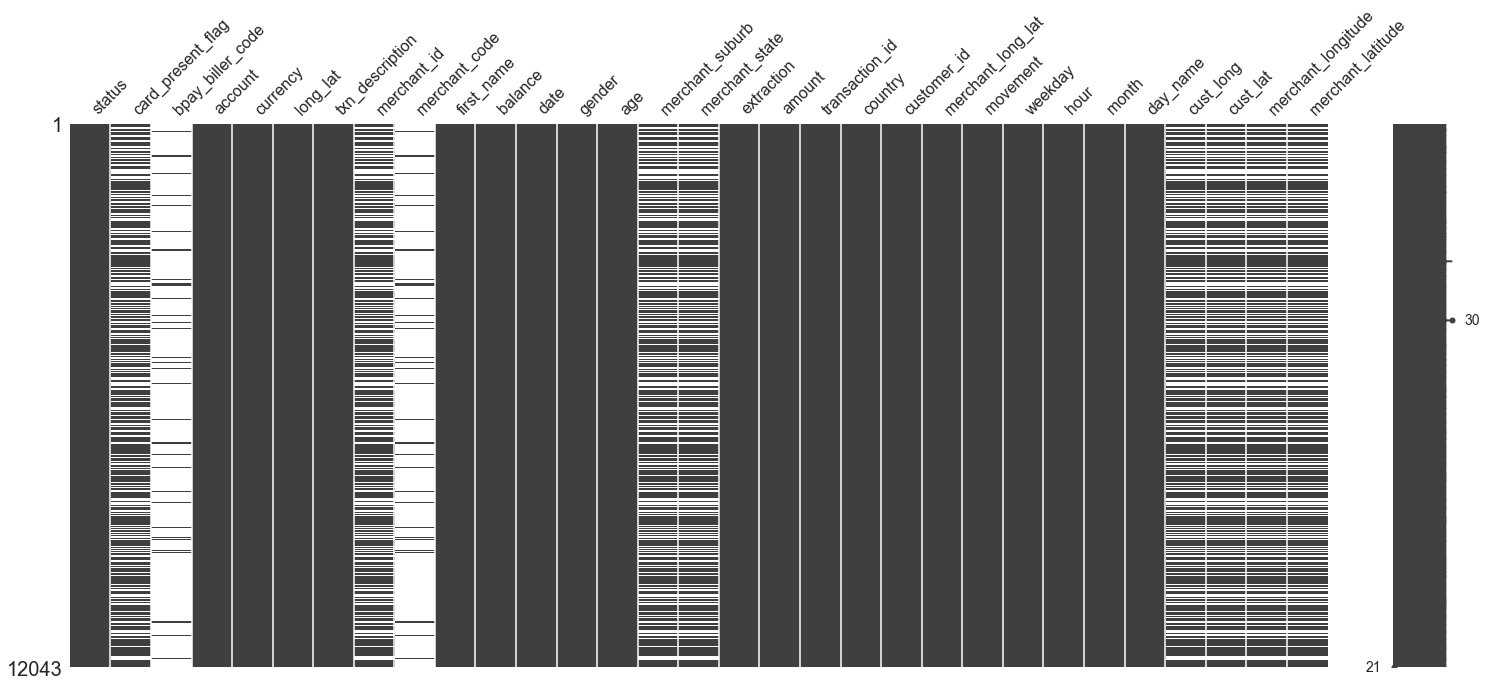

In [23]:
msno.matrix(transact)

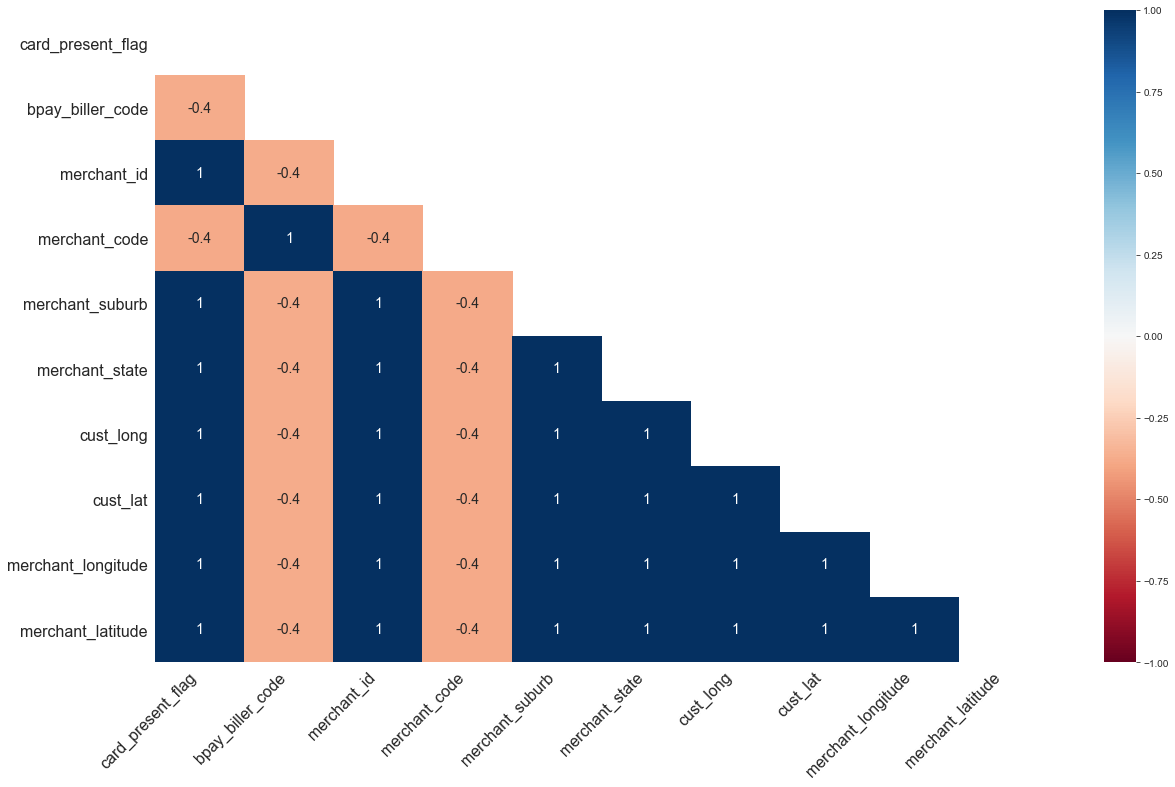

In [24]:
msno.heatmap(transact)

**Visualizing the transaction description**

In [25]:
transact.txn_description.value_counts(normalize=True)

SALES-POS     0.326663
POS           0.314124
PAYMENT       0.215893
PAY/SALARY    0.073321
INTER BANK    0.061613
PHONE BANK    0.008387
Name: txn_description, dtype: float64

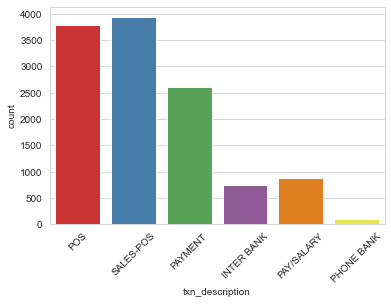

In [26]:
g = sns.countplot(transact.txn_description,palette='Set1')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()



1.   SALES-POS & POS  account for over 60% of the  transactions performed.
2.   PHONE BANK is the least used mode of transacting accounting for 0.84% of total transactions performed.



**Visualizing the transaction movement, ie, credit/debit**

In [27]:
transact.movement.value_counts(normalize=True)

debit     0.926679
credit    0.073321
Name: movement, dtype: float64

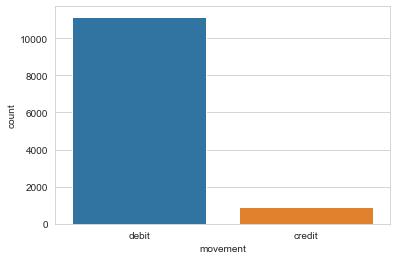

In [28]:
sns.countplot(transact.movement)

Text(0.5, 0, 'Movement')

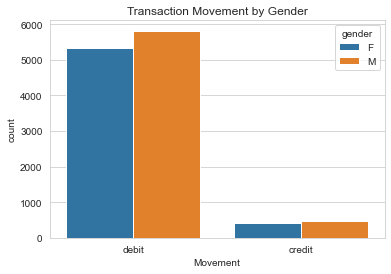

In [29]:
sns.countplot(x='movement',hue='gender',data=transact)
plt.title('Transaction Movement by Gender')
plt.xlabel('Movement')



*   The transactions are predominantly debit transactions (~92.7%)
*   Within each nature of transaction (movement), Males make up the bulk. This is expected as there are more Males in the customer demographics.



**Visualizing the transaction status**

In [30]:
transact.status.value_counts(normalize=True)

authorized    0.640787
posted        0.359213
Name: status, dtype: float64

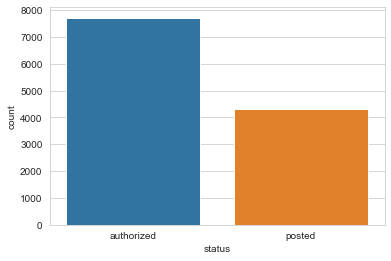

In [31]:
sns.countplot(transact.status)

In [32]:
transact.groupby('status').count()['movement']

status
authorized    7717
posted        4326
Name: movement, dtype: int64

Text(0.5, 0, 'Status')

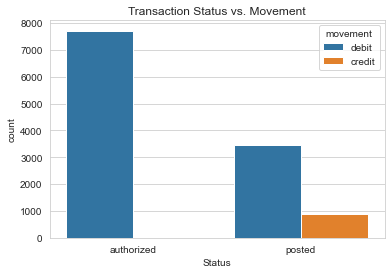

In [33]:
sns.countplot(x='status',hue='movement',data=transact)
plt.title('Transaction Status vs. Movement')
plt.xlabel('Status')



*   There are more authorized transactions ( approximately 64%) than there are posted transactions (~36%)
*   All authorized transactions are debit transactions.



**Visualizing the number of Male & Female Customers**

In [34]:
transact.gender.value_counts(normalize=True)

M    0.52188
F    0.47812
Name: gender, dtype: float64

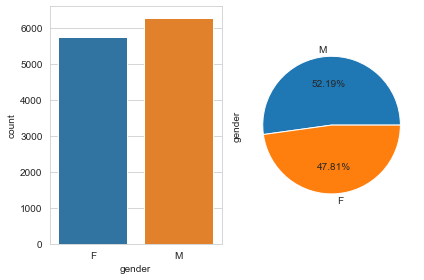

In [35]:
f,axes=plt.subplots(1,2)
sns.countplot(transact.gender,ax=axes[0])
transact.gender.value_counts(normalize=True).plot(kind='pie', autopct='%.2f%%',ax=axes[1])
plt.tight_layout()

**Visualizing Merchant State**

In [36]:
transact.merchant_state.value_counts(normalize=True)

NSW    0.281068
VIC    0.276144
QLD    0.201633
WA     0.142542
SA     0.053777
NT     0.026565
ACT    0.009460
TAS    0.008812
Name: merchant_state, dtype: float64

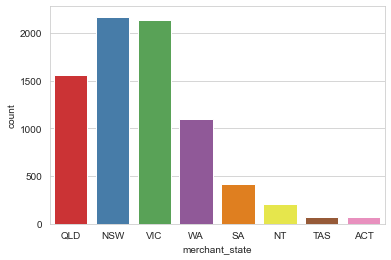

In [37]:
sns.countplot(transact.merchant_state,palette='Set1')

Text(0.5, 1.0, 'Distribution of transactions by Merchant State and Gender')

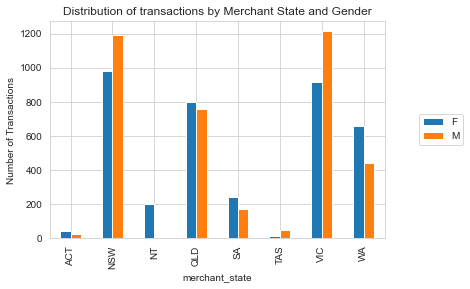

In [38]:
Gender = pd.crosstab(transact['merchant_state'],transact.gender)
Gender.plot(kind='bar')
plt.legend(loc='center right',bbox_to_anchor=(1.25,0.5))
plt.ylabel('Number of Transactions')
plt.title('Distribution of transactions by Merchant State and Gender')



*   The states of NSW and VIC account for over 55% of the transactions performed. This is expected as they are the two top economic hubs of Australia.
*   On customer demographics by state, VIC, NSW & TAS are the only states where there are more Males than Females.



**Visualizing the age distribution of the customers**

Text(0.5, 1.0, 'Customer Age Distribution')

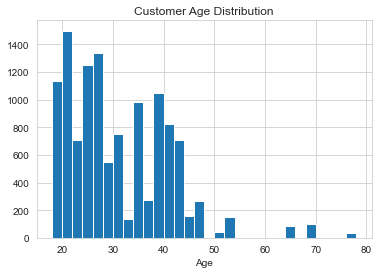

In [39]:
transact['age'].hist(bins=30)
plt.xlabel('Age')
plt.title('Customer Age Distribution')



*   The bank customers are made up of a fairly young 
to middle age population with a few outliers of people above 55 years old.


**Visualizing customer age distribution by gender**

<Figure size 720x432 with 0 Axes>

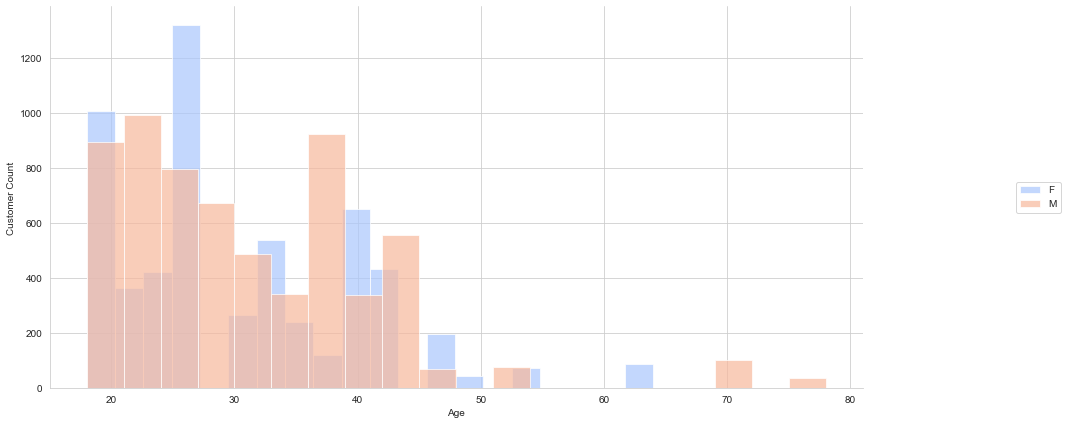

In [40]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
g = sns.FacetGrid(transact,hue="gender",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'age',bins=20,alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.legend(loc='center right',bbox_to_anchor=(1.25,0.5))



*   The age distribution by gender shows that men are on average more than their female counterparts within each age group. This is expected as there are more Male than Female.



**Visualizing account balances by age**

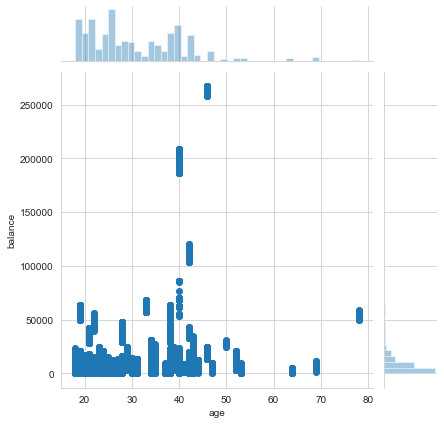

In [41]:
sns.jointplot(x='age',y='balance',data=transact)



*   The highest balances are held by people with the ages 35 to 45 years old. This is expected as people in this age bracket may be having more years experirence and consequently higher salaries and some may hold managerial/senior positions which have higher income packages.




**Visualizing account balances**

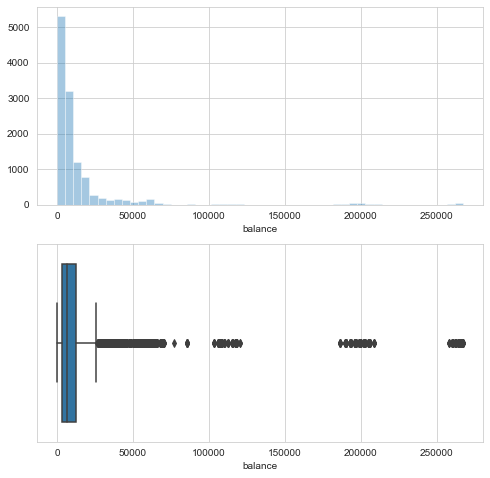

In [42]:
f,axes=plt.subplots(2,1,figsize=(8,8))
sns.distplot(transact.balance,kde=False,ax=axes[0])
plt.xlabel('Balance')
sns.boxplot(transact.balance,ax=axes[1])
plt.show()

**The transactions include purchase and other types-payment, inter bank, pay/salary, phone bank etc,it is worthwhile to filter these out from the overall dataset and have a look.**

Assuming purchase transactions must be associated with a merchant (have a merchant_id)

In [43]:
purchase_transactions = transact[transact['merchant_id'].notnull()]

In [44]:
purchase_transactions.shape

(7717, 31)

In [45]:
transact['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [46]:
purchase_transactions.txn_description.unique()

array(['POS', 'SALES-POS'], dtype=object)

In [47]:
set(transact.txn_description).intersection(set(purchase_transactions.txn_description))

{'POS', 'SALES-POS'}

In [48]:
purchase_transactions['month'].value_counts()

Sept    2601
Oct     2581
Aug     2535
Name: month, dtype: int64

In [49]:
purchase_transactions['customer_id'].value_counts()

CUS-2487424745    531
CUS-2142601169    276
CUS-3026014945    248
CUS-1614226872    220
CUS-860700529     206
                 ... 
CUS-495599312       9
CUS-3151318058      9
CUS-2630892467      4
CUS-2500783281      4
CUS-1646183815      3
Name: customer_id, Length: 100, dtype: int64

In [50]:
transact['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

**Visualize the distribution of transaction amount**

Text(0, 0.5, 'Frequency')

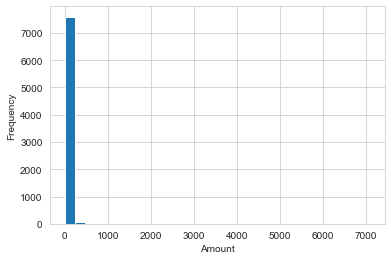

In [51]:
purchase_transactions['amount'].hist(bins=30)
plt.xlabel('Amount')
plt.ylabel('Frequency')

Exclude the outliers in the plot

Text(0.5, 0, 'Month')

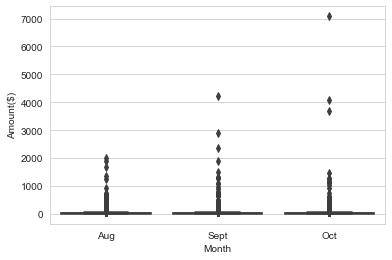

In [52]:
sns.boxplot(x='month',y='amount',data=purchase_transactions)
plt.ylabel('Amount($)')
plt.xlabel('Month')

Text(0.5, 1.0, 'Histogram of purchase transaction amount')

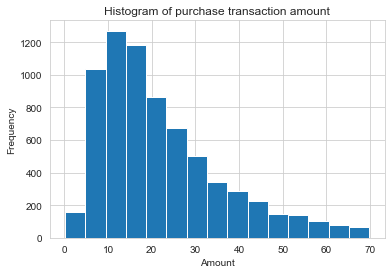

In [53]:
purchase_transactions[purchase_transactions['amount']<70]['amount'].hist(bins=15)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of purchase transaction amount')

In [54]:
col = ['amount']
Q1 = purchase_transactions[col].quantile(0.25)
Q3 = purchase_transactions[col].quantile(0.75)
IQR = Q3 - Q1

purchase_transactions = purchase_transactions[~((purchase_transactions[col] < (Q1 - 1.5 * IQR)) |(purchase_transactions[col] > (Q3 + 1.5 * IQR))).any(axis=1)]

Text(0.5, 1.0, 'History of Purchase Transaction Amount')

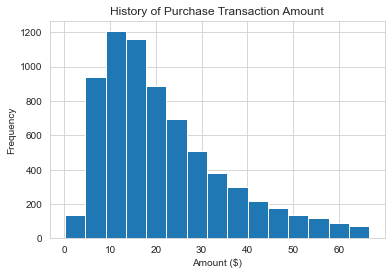

In [55]:
purchase_transactions['amount'].hist(bins=15)
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.title('History of Purchase Transaction Amount')

Text(0.5, 1.0, 'History of Overall Transaction Amount')

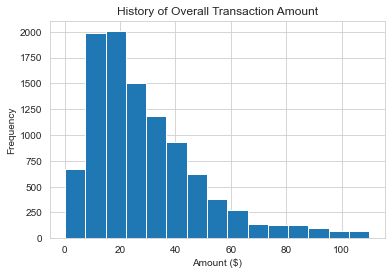

In [56]:
col = ['amount']
Q1 = transact[col].quantile(0.25)
Q3 = transact[col].quantile(0.75)
IQR = Q3 - Q1

trans = transact[~((transact[col] < (Q1 - 1.5 * IQR)) |(transact[col] > (Q3 + 1.5 * IQR))).any(axis=1)]
trans['amount'].hist(bins=15)
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.title('History of Overall Transaction Amount')

In [57]:
dayHour = transact.groupby(by=['weekday','hour']).count()['txn_description'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,9,17,14,32,18,14,27,13,54,171,...,89,70,28,85,28,36,87,66,50,34
1,10,23,27,34,46,33,24,55,62,188,...,104,91,73,142,59,41,61,41,33,38
2,12,38,19,7,31,5,64,53,129,222,...,124,170,109,162,52,88,90,72,47,82
3,18,30,32,30,59,31,37,49,101,183,...,110,140,69,133,70,96,48,68,84,68
4,22,34,32,34,67,26,49,40,92,131,...,132,121,118,123,79,137,87,183,69,73


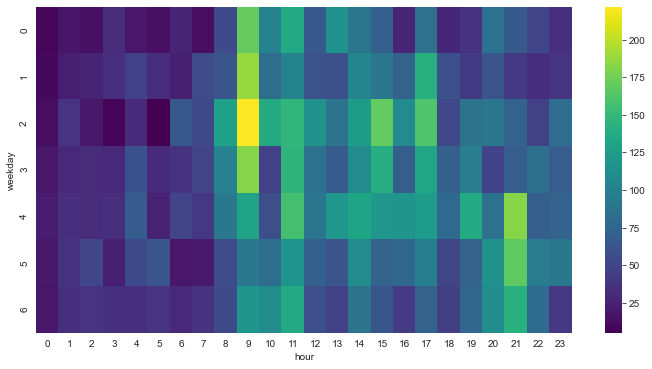

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [59]:
transact.groupby('customer_id').count()['month'].sort_values(ascending=False)

customer_id
CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: month, Length: 100, dtype: int64

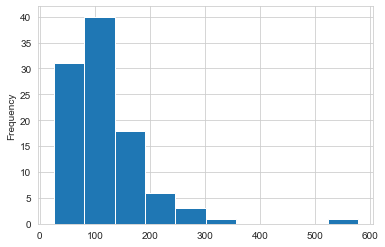

In [60]:
transact.groupby('customer_id').count()['month'].plot(kind='hist')

**Visualize transaction volume over an average week**

Text(0, 0.5, 'Transaction Volume')

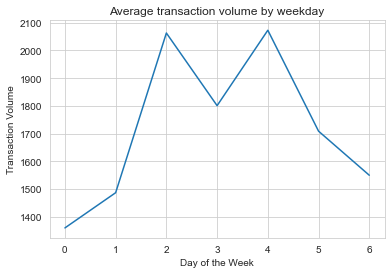

In [61]:
transact.groupby('weekday').count()['txn_description'].plot(kind='line')
plt.title('Average transaction volume by weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Volume')

**Visualize transaction volume over an average week**

Text(0.5, 1.0, 'Average transaction volume by hour')

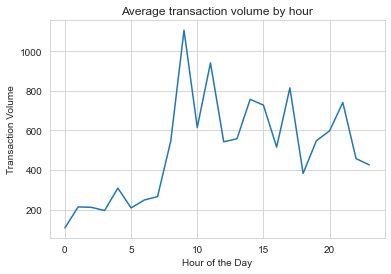

In [62]:
transact.groupby('hour').count()['txn_description'].plot(kind='line')
plt.ylabel('Transaction Volume')
plt.xlabel('Hour of the Day')
plt.title('Average transaction volume by hour')

# **Feature Engineering**

In [63]:
transact.status.unique()

array(['authorized', 'posted'], dtype=object)

In [64]:
transact.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [65]:
transact.card_present_flag.unique()

array([ 1.,  0., nan])

In [66]:
transact.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [67]:
transact.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [68]:
dmap = {'debit':1,'credit':0}
transact['movement'] = transact['movement'].map(dmap)

In [69]:
transact.gender.unique()

array(['F', 'M'], dtype=object)

In [70]:
transact['gender'] = transact['gender'].replace({'M':1,'F':0})

In [71]:
transact.account.nunique()

100

In [72]:
transact.account.value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

In [73]:
transact.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'weekday', 'hour', 'month', 'day_name', 'cust_long',
       'cust_lat', 'merchant_longitude', 'merchant_latitude'],
      dtype='object')

In [74]:
transact.country.value_counts()

Australia    12043
Name: country, dtype: int64

In [75]:
transact.currency.value_counts()

AUD    12043
Name: currency, dtype: int64

In [76]:
transact.merchant_id.value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
6ddddc40-5b69-4253-8a26-167999a8bf96    10
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
                                        ..
4cde9948-295b-4058-ae6f-9f76161698dc     1
63d09405-ec4d-493d-9b38-0845505821d2     1
98f8bc1c-462f-4adb-9fbc-c135364ff429     1
3958f1b8-0c3e-4fb9-9a41-c3dcd6da32e0     1
4e891f2d-6f85-4283-9f43-263f05f8b65d     1
Name: merchant_id, Length: 5725, dtype: int64

In [77]:
transact.transaction_id.nunique()

12043

In [78]:
transact.merchant_suburb.value_counts()

Melbourne          255
Sydney             233
Southport           82
Brisbane City       79
Chatswood           55
                  ... 
Moonyoonooka         1
Edinburgh            1
Kallaroo             1
Blackburn South      1
Attadale             1
Name: merchant_suburb, Length: 1609, dtype: int64

In [79]:
transact.merchant_suburb.nunique()

1609

In [80]:
transact.corr()

,card_present_flag,merchant_code,balance,gender,age,amount,movement,weekday,hour,cust_long,cust_lat,merchant_longitude,merchant_latitude
card_present_flag,1.000000,NaN,0.005925,-0.001427,-0.008405,-0.002074,NaN,-0.010501,-0.004132,0.004434,0.002840,0.004434,0.002840
merchant_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.005925,NaN,1.000000,0.080302,0.199329,0.059178,-0.013739,-0.007817,0.013898,-0.005321,-0.135806,-0.005321,-0.135806
gender,-0.001427,NaN,0.080302,1.000000,0.011584,0.031362,-0.002028,0.005505,-0.005792,0.106384,-0.141977,0.106384,-0.141977
age,-0.008405,NaN,0.199329,0.011584,1.000000,0.029980,-0.057389,-0.001064,-0.000568,0.122106,-0.125215,0.122106,-0.125215
amount,-0.002074,NaN,0.059178,0.031362,0.029980,1.000000,-0.812087,-0.135483,0.032348,0.023031,-0.014456,0.023031,-0.014456
movement,NaN,NaN,-0.013739,-0.002028,-0.057389,-0.812087,1.000000,0.166363,-0.044434,NaN,NaN,NaN,NaN
weekday,-0.010501,NaN,-0.007817,0.005505,-0.001064,-0.135483,0.166363,1.000000,0.053095,0.008967,0.003843,0.008967,0.003843
hour,-0.004132,NaN,0.013898,-0.005792,-0.000568,0.032348,-0.044434,0.053095,1.000000,-0.003056,-0.004902,-0.003056,-0.004902
cust_long,0.004434,NaN,-0.005321,0.106384,0.122106,0.023031,NaN,0.008967,-0.003056,1.000000,-0.061510,1.000000,-0.061510


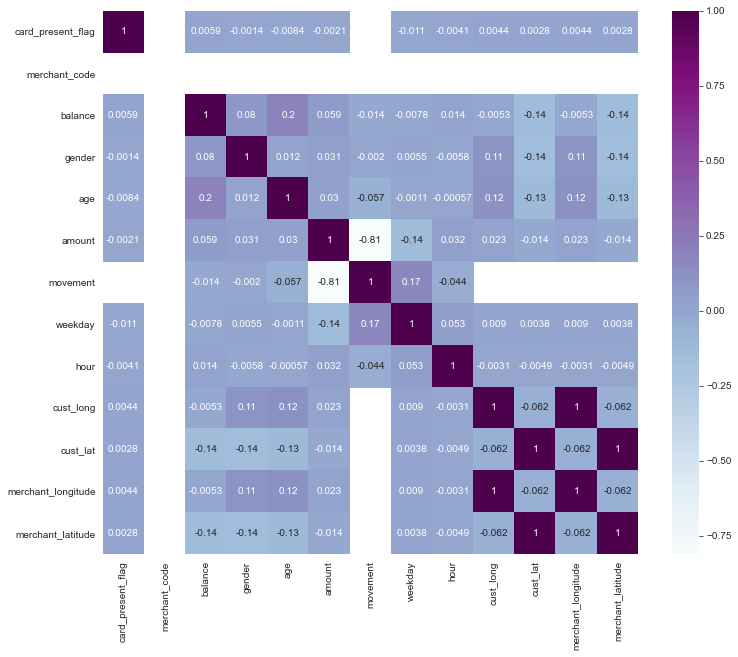

In [81]:
plt.figure(figsize=(12,10))
sns.heatmap(transact.corr(),cmap='BuPu',annot=True)

In [82]:
transact = transact.drop(['long_lat','merchant_long_lat','country',
                          'currency','merchant_id','first_name','status',
                          'transaction_id','merchant_suburb','extraction',
                         'merchant_state','bpay_biller_code','merchant_code',
                          'date','extraction','weekday','month','hour',
                          'merchant_longitude','merchant_latitude','cust_long',
                          'cust_lat','day_name','card_present_flag','account'],axis=1)

In [83]:
100*transact.isnull().sum()/transact.shape[0]

txn_description    0.0
balance            0.0
gender             0.0
age                0.0
amount             0.0
customer_id        0.0
movement           0.0
dtype: float64

**Identify the annual salary for each customer**

In [84]:
transact.txn_description.unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

Filter all transactions where the description is PAY/SALARY

In [85]:
df_salary = transact[transact['txn_description']=='PAY/SALARY']
df_salary

,txn_description,balance,gender,age,amount,customer_id,movement
50,PAY/SALARY,8342.11,1,23,3903.95,CUS-1462656821,0
61,PAY/SALARY,2040.58,0,23,1626.48,CUS-2500783281,0
64,PAY/SALARY,3158.51,1,22,983.36,CUS-326006476,0
68,PAY/SALARY,2517.66,1,24,1408.08,CUS-1433879684,0
70,PAY/SALARY,2271.79,0,43,1068.04,CUS-4123612273,0
...,...,...,...,...,...,...,...
11995,PAY/SALARY,9378.51,1,26,1098.91,CUS-1646621553,0
12000,PAY/SALARY,3440.01,0,30,1158.15,CUS-1271030853,0
12001,PAY/SALARY,11381.44,1,69,1043.12,CUS-1388323263,0
12003,PAY/SALARY,11454.52,0,20,1395.49,CUS-164374203,0


**Check the salary payment frequency for each customer over the 91 day period so as to ascertain the annual salary**

In [86]:
df_salary['amount'].value_counts().head(50)

1068.04    14
1395.49    14
1013.67    14
1043.12    14
1098.91    14
1626.48    14
1158.15    14
983.36     14
2280.36    13
1138.79    13
862.95     13
1636.72    13
2588.01    13
892.09     13
2544.76    13
1880.95    13
970.47     13
2443.24    13
1059.84    13
1711.39    13
1037.07    13
1560.20    13
1272.47    13
917.45     13
990.55     13
1396.23    13
1225.33    13
996.24     13
576.00     13
1002.13    13
761.33     13
1099.70    13
1946.57    13
982.71     13
664.43     13
782.42     12
596.33     12
725.32     12
920.71     12
916.75     12
1757.82     7
1436.98     7
3903.95     7
2647.38     7
2282.36     7
3785.78     7
3977.46     7
3517.61     7
4405.30     7
3903.73     7
Name: amount, dtype: int64

In [87]:
freq = df_salary.groupby('customer_id').count()['txn_description'].sort_values(ascending=False)

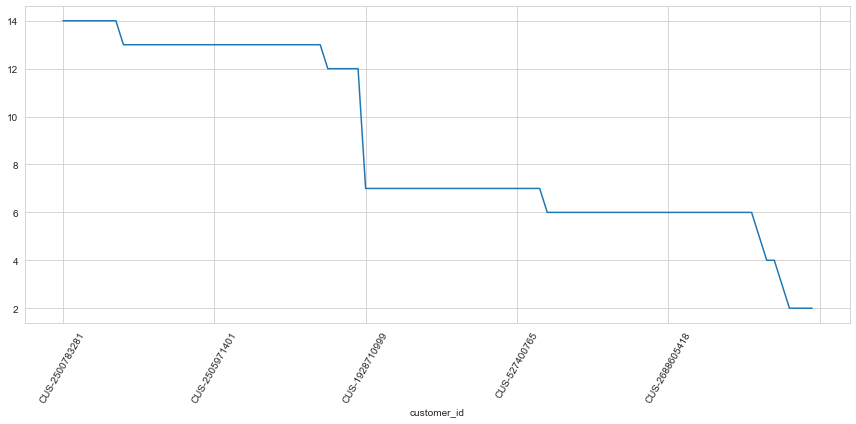

In [88]:
plt.figure(figsize=(12,6))
df_salary.groupby('customer_id').count()['txn_description'].sort_values(ascending=False).plot(kind='line')
plt.xticks(rotation=60)
plt.tight_layout()

In [89]:
df_salary.groupby('customer_id').count()['txn_description'].sort_values(ascending=False).value_counts()

6     28
13    27
7     24
14     8
12     5
2      4
4      2
5      1
3      1
Name: txn_description, dtype: int64

In [90]:
df_salary = df_salary.drop('txn_description',axis=1)

In [91]:
df_salary.shape

(883, 6)

**Calculate the annual salary**

In [92]:
sal_frequency = pd.DataFrame(freq).reset_index()
sal_frequency = sal_frequency.rename(columns={'txn_description':'txn_frequency'})
sal_frequency

,customer_id,txn_frequency
0,CUS-2500783281,14
1,CUS-1271030853,14
2,CUS-164374203,14
3,CUS-326006476,14
4,CUS-1388323263,14
...,...,...
95,CUS-423725039,3
96,CUS-2178051368,2
97,CUS-497688347,2
98,CUS-51506836,2


In [93]:
df_salary[df_salary['customer_id'] == "CUS-2500783281"]

,balance,gender,age,amount,customer_id,movement
61,2040.58,0,23,1626.48,CUS-2500783281,0
938,3287.56,0,23,1626.48,CUS-2500783281,0
1835,4644.04,0,23,1626.48,CUS-2500783281,0
2626,5697.52,0,23,1626.48,CUS-2500783281,0
3562,7208.00,0,23,1626.48,CUS-2500783281,0
4509,8718.48,0,23,1626.48,CUS-2500783281,0
5430,10228.96,0,23,1626.48,CUS-2500783281,0
6377,11435.44,0,23,1626.48,CUS-2500783281,0
7301,12638.92,0,23,1626.48,CUS-2500783281,0
8255,14149.40,0,23,1626.48,CUS-2500783281,0


In [94]:
df_salary[df_salary['customer_id'] == "CUS-423725039"]

,balance,gender,age,amount,customer_id,movement
2938,3992.78,0,24,3712.56,CUS-423725039,0
7081,7076.21,0,24,3712.56,CUS-423725039,0
11064,9707.77,0,24,3712.56,CUS-423725039,0


In [95]:
# assume the salary frequency is constact for each customer over a financial year of 365 days
df_salary = pd.merge(df_salary,sal_frequency,how='inner',on='customer_id')
df_salary.head()

,balance,gender,age,amount,customer_id,movement,txn_frequency
0,8342.11,1,23,3903.95,CUS-1462656821,0,7
1,10724.87,1,23,3903.95,CUS-1462656821,0,7
2,13030.74,1,23,3903.95,CUS-1462656821,0,7
3,15523.69,1,23,3903.95,CUS-1462656821,0,7
4,17906.31,1,23,3903.95,CUS-1462656821,0,7


In [96]:
df_salary['annual_salary'] = 365.25*df_salary['amount']*df_salary['txn_frequency']/91
df_salary.head()

,balance,gender,age,amount,customer_id,movement,txn_frequency,annual_salary
0,8342.11,1,23,3903.95,CUS-1462656821,0,7,109685.979808
1,10724.87,1,23,3903.95,CUS-1462656821,0,7,109685.979808
2,13030.74,1,23,3903.95,CUS-1462656821,0,7,109685.979808
3,15523.69,1,23,3903.95,CUS-1462656821,0,7,109685.979808
4,17906.31,1,23,3903.95,CUS-1462656821,0,7,109685.979808


**Visualize the distribution of the customers' annual salary**

Text(0, 0.5, 'Frequency')

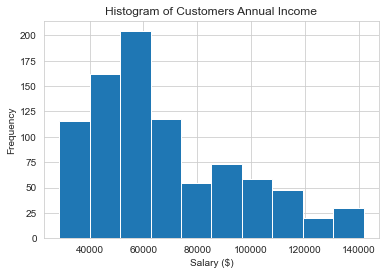

In [97]:
df_salary.annual_salary.hist()
plt.title('Histogram of Customers Annual Income')
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')

In [98]:
df_salary = df_salary.drop('txn_frequency',axis=1)

In [99]:
df_salary.columns

Index(['balance', 'gender', 'age', 'amount', 'customer_id', 'movement',
       'annual_salary'],
      dtype='object')

**Explore the correlations between the annual salary and various customer attributes**

In [100]:
df_salary.corr()

,balance,gender,age,amount,movement,annual_salary
balance,1.000000,0.138691,0.194956,0.287501,NaN,0.179198
gender,0.138691,1.000000,0.031567,0.181306,NaN,0.101318
age,0.194956,0.031567,1.000000,-0.138594,NaN,-0.079536
amount,0.287501,0.181306,-0.138594,1.000000,NaN,0.638000
movement,NaN,NaN,NaN,NaN,NaN,NaN
annual_salary,0.179198,0.101318,-0.079536,0.638000,NaN,1.000000


In [101]:
df_salary.movement.nunique()

1

In [102]:
df_salary = df_salary.drop('movement',axis=1)

In [103]:
df_salary.age.describe()

count    883.000000
mean      32.631937
std       12.276731
min       18.000000
25%       22.000000
50%       30.000000
75%       40.000000
max       78.000000
Name: age, dtype: float64

In [104]:
df_salary['age_bins'] = pd.cut(x=df_salary['age'], bins=[16,35,55,75],labels=['youth/young_adult','middle_aged','senior_citizen/pensioneer'])
df_salary.tail()

,balance,gender,age,amount,customer_id,annual_salary,age_bins
878,9707.77,0,24,3712.56,CUS-423725039,44703.710110,youth/young_adult
879,4863.86,0,27,4863.62,CUS-1739931018,39042.575934,youth/young_adult
880,8905.77,0,27,4863.62,CUS-1739931018,39042.575934,youth/young_adult
881,6111.57,1,25,6107.23,CUS-2178051368,49025.621044,youth/young_adult
882,10753.02,1,25,6107.23,CUS-2178051368,49025.621044,youth/young_adult


In [105]:
df_salary[df_salary["customer_id"] == "CUS-1462656821"]["balance"]

0     8342.11
1    10724.87
2    13030.74
3    15523.69
4    17906.31
5    21236.51
6    24451.16
Name: balance, dtype: float64

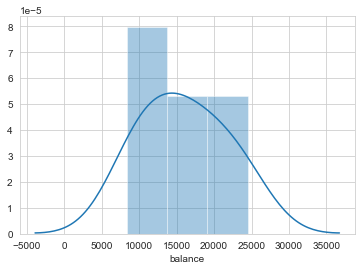

In [106]:
sns.distplot(df_salary[df_salary["customer_id"] == "CUS-1462656821"]["balance"],hist=True,kde=True)

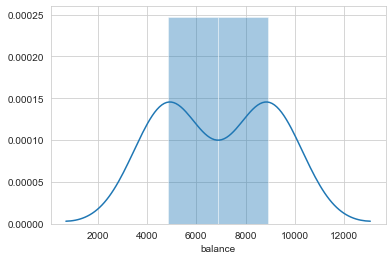

In [107]:
sns.distplot(df_salary[df_salary["customer_id"] == "CUS-1739931018"]["balance"],hist=True,kde=True)

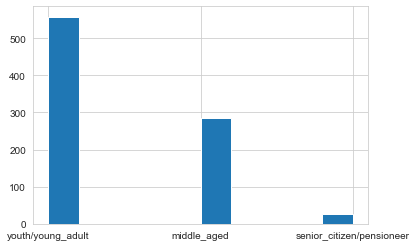

In [108]:
df_salary.age_bins.hist()

In [109]:
age_dummies = pd.get_dummies(df_salary['age_bins'],drop_first=True)
df_salary = pd.concat([df_salary.drop(['age_bins','amount'],axis=1),age_dummies],axis=1)
df_salary.head()

,balance,gender,age,customer_id,annual_salary,middle_aged,senior_citizen/pensioneer
0,8342.11,1,23,CUS-1462656821,109685.979808,0,0
1,10724.87,1,23,CUS-1462656821,109685.979808,0,0
2,13030.74,1,23,CUS-1462656821,109685.979808,0,0
3,15523.69,1,23,CUS-1462656821,109685.979808,0,0
4,17906.31,1,23,CUS-1462656821,109685.979808,0,0


# **Train Test Split**

**Import train_test_split from sklearn**

In [110]:
from sklearn.model_selection import train_test_split

**Set X and y variables of the features and target**

In [111]:
X = df_salary.drop(['customer_id','annual_salary'],axis=1)
y = df_salary['annual_salary']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# **Normalizing the Data**

**Use a MinMaxScaler to normalize the feature data X_train and X_test.**

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Creating the Model**

In [114]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [115]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [116]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out coefficients of the model.**

In [117]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 32207.14268743   5817.89992837 -11144.52492535    835.88271549
 -15363.1910481 ]


# **Predicting Test Data**

In [118]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

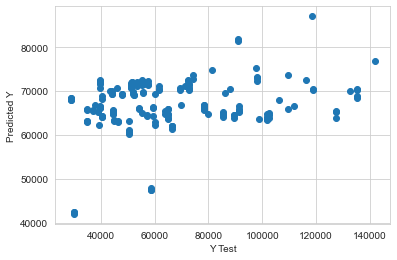

In [119]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# **Evaluating the Model**

In [120]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 21315.527750146197
MSE: 689010805.7240721
RMSE: 26249.01532865704


# **Residuals**

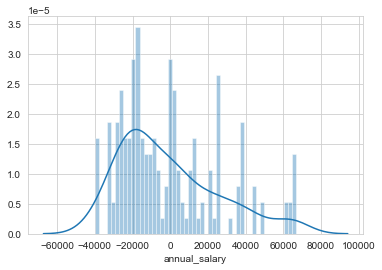

In [121]:
sns.distplot((y_test-predictions),bins=50);

In [122]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
balance,32207.142687
gender,5817.899928
age,-11144.524925
middle_aged,835.882715
senior_citizen/pensioneer,-15363.191048
